# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 목표

서비스 구독 연장 사용자 예측

## 가설

* **서비스에 만족한 사용자가 구독을 연장할 것**
    * 만족한 사실은 어떻게 알 수 있을까?
        * 서비스 이용 시간
            * 서비스에 만족할수록 로그인 빈도가 높아 최근까지도 로그인했을 확률이 높으므로  
            -> **마지막으로 로그인한 시간**이 오래될수록 구독 연장 확률이 낮을 것
        * 학습 패턴
            * 서비스에 만족할수록 학습량과 시간이 많을 것이므로(학습량은 높지만 불만족한 경우?)  
            -> **보다 자주, 많이 학습**하는 사용자가 구독 연장 확률이 높을 것(학습량, 학습시간) 
            * 학습 성취도가 낮으면 만족도가 떨어질 것이므로  
            -> **최근 학습 성취도**가 낮을수록, **중단된 학습 세션 수**가 많을수록 구독 연장 확률이 낮을 것(난이도와의 관계 파악해보기)
        * ~~콘텐츠에 대한 반응~~
            * ~~**커뮤니티 참여도**가 높을수록 구독 연장 확률이 높을 것~~  
            ~~(서비스 만족도와 연관이 있을까? 학습량-시간과의 관계를 봐야 할듯)~~
        * 이용 행태
            * 서비스에 만족했다면 지속적으로 결제했을 확률이 높으므로  
            -> **최근 3개월 모두 결제한 경우(7)** 구독 연장 확률이 높을 것
            * **이탈한 사용자(2, 4, 6)와 (7)사용자와의 차이**가 중요한 요인일듯  
            (여기서 발견된 패턴으로 다시 검증 필요)


        * ~~서비스 이용 시간-학습 패턴~~
            * ~~**로그인 시간 대비 학습 시간의 비율**이 클수록 구독 연장 확률이 높을 것~~  
            ~~(단순히 학습량에 따른 차이가 아니라 로그인 시간 대비로 보면 학습의 순도를 더 정확하게 파악할 수 있을듯)~~
        * ~~학습 패턴-콘텐츠에 대한 반응~~
            * ~~**학습량-학습 시간**과 **커뮤니티 참여도**가 모두 높은 경우 구독 연장 확률이 매우 높을 것~~
            
* 위 요인들과 **결제패턴, 다음 달 구독 연장 여부**와의 관계를 바탕으로 가설을 어느정도 검증해볼 수 있지 않을까?  

## 데이터 살펴보기

    * user_id: 사용자의 고유 식별자

* 서비스 이용 시간
    * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
    * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
    * average_login_time:  사용자의 일반적인 로그인 시간

* 학습 패턴
    * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
    * monthly_active_learning_days: 월간 활동적인 학습 일수
    * total_completed_courses: 완료한 총 코스 수
    * recent_learning_achievement: 최근 학습 성취도
    * abandoned_learning_sessions: 중단된 학습 세션 수

* 콘텐츠에 대한 반응
    * community_engagement_level: 커뮤니티 참여도
    * preferred_difficulty_level: 선호하는 난이도
    * customer_inquiry_history: 고객 문의 이력
    
* 이용 행태
    * subscription_type: 구독 유형
    * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
      - 7: 3개월 모두 결제함
      - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음 -> 이탈
      - 5: 첫 달과 마지막 달에 결제함 -> 복귀
      - 4: 첫 달에만 결제함 -> 이탈
      - 3: 마지막 2개월에 결제함
      - 2: 가운데 달에만 결제함 -> 이탈
      - 1: 마지막 달에만 결제함
      - 0: 3개월 동안 결제하지 않음
    * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

# 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('data/mini.csv',sep=',')
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [7]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


# 전처리

In [8]:
# 레벨, 등급을 표현하는 데이터를 문자열 자료형으로 변환(community_engagement_level, customer_inquiry_history, payment_pattern, target)

data['community_engagement_level'] = data['community_engagement_level'].astype(str)
data['customer_inquiry_history'] = data['customer_inquiry_history'].astype(str)
data['payment_pattern'] = data['payment_pattern'].astype(str)
data['target'] = data['target'].astype(str)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  object 
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

# 분석

## 결제 패턴과 다음달 구독 연장 여부의 관계

In [10]:
grouping = data.groupby(['payment_pattern','target'])
grouping

In [11]:
pay = data.groupby('payment_pattern')['user_id'].count()
pay

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64

In [12]:
#결제패턴과 다음달연장여부를 기준으로 유저 나눠 보기
subscription = data.groupby(['payment_pattern', 'target'])
subscription

In [13]:
target_data = subscription['user_id'].apply(pd.Series.nunique)
target_data = pd.DataFrame(target_data)
target_data

user_id
payment_pattern target         
0               0           468
                1           807
1               0           502
                1           783
2               0           459
                1           747
3               0           467
                1           763
4               0           461
                1           753
5               0           488
                1           750
6               0           467
                1           801
7               0           489
                1           795

In [14]:
#피벗 테이블로 표시

target_counts = target_data.pivot_table(index=["target"],
                                  columns=["payment_pattern"],
                                  values=["user_id"])
target_counts

user_id                                   
payment_pattern       0    1    2    3    4    5    6    7
target                                                    
0                   468  502  459  467  461  488  467  489
1                   807  783  747  763  753  750  801  795

In [15]:
#백분율로 표시
retention = target_counts
total = data['user_id'].count()
total

10000

In [16]:
retention = target_counts.divide(total)
retention.head()

user_id                                                  \
payment_pattern       0       1       2       3       4       5       6   
target                                                                    
0                0.0468  0.0502  0.0459  0.0467  0.0461  0.0488  0.0467   
1                0.0807  0.0783  0.0747  0.0763  0.0753  0.0750  0.0801   

                         
payment_pattern       7  
target                   
0                0.0489  
1                0.0795

In [17]:
retention.round(3)*100

user_id                                   
payment_pattern       0    1    2    3    4    5    6    7
target                                                    
0                   4.7  5.0  4.6  4.7  4.6  4.9  4.7  4.9
1                   8.1  7.8  7.5  7.6  7.5  7.5  8.0  8.0

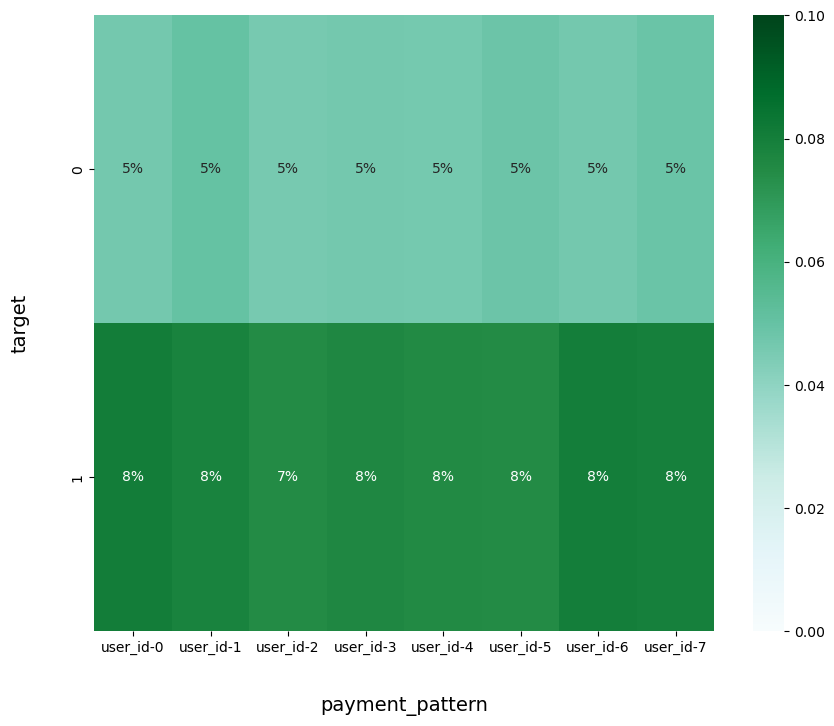

In [18]:
plt.figure(figsize=(10,8))

sns.heatmap(data= retention,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           fmt='.0%', #values(데이터의 값) 값의 소수점 표기
           vmin=0,# 색범위 최소값 설정
           vmax=0.1,# 색범위 최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)

plt.xlabel('payment_pattern', fontsize=14,labelpad=30)

plt.ylabel('target', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

결제 패턴과 다음달 구독 연장 여부의 관계 미미함

## 마지막 로그인 시간과 결제 패턴의 관계

In [19]:
login = data.groupby('recent_login_time')['user_id'].count()
login

recent_login_time
1     347
2     350
3     349
4     332
5     355
6     362
7     322
8     322
9     350
10    335
11    306
12    365
13    363
14    366
15    325
16    347
17    354
18    336
19    380
20    362
21    333
22    349
23    338
24    328
25    323
26    359
27    370
28    313
29    359
Name: user_id, dtype: int64

In [20]:
login_pay = data.groupby(['payment_pattern', 'recent_login_time'])
login_pay

In [21]:
login_data = login_pay['user_id'].apply(pd.Series.nunique)
login_data = pd.DataFrame(login_data)
login_data

user_id
payment_pattern recent_login_time         
0               1                       43
                2                       45
                3                       49
                4                       43
                5                       46
...                                    ...
7               25                      38
                26                      44
                27                      47
                28                      33
                29                      49

[232 rows x 1 columns]

In [22]:
#피벗 테이블로 표시

login_pivot_table = login_data.pivot_table(index=["recent_login_time"],
                                    columns=["payment_pattern"],
                                    values=["user_id"])
login_pivot_table.head()

user_id                            
payment_pattern         0   1   2   3   4   5   6   7
recent_login_time                                    
1                      43  47  43  51  40  33  42  48
2                      45  53  38  35  44  43  45  47
3                      49  45  33  44  41  45  45  47
4                      43  52  44  40  39  33  40  41
5                      46  47  42  36  38  46  53  47

In [23]:
login_pivot_table.describe()

user_id                                              \
payment_pattern          0          1          2          3          4   
count            29.000000  29.000000  29.000000  29.000000  29.000000   
mean             43.965517  44.310345  41.586207  42.413793  41.862069   
std               7.043146   5.581241   4.633089   6.500095   6.300364   
min              31.000000  35.000000  30.000000  28.000000  26.000000   
25%              38.000000  40.000000  39.000000  37.000000  40.000000   
50%              45.000000  45.000000  43.000000  43.000000  42.000000   
75%              49.000000  48.000000  44.000000  48.000000  44.000000   
max              58.000000  54.000000  51.000000  52.000000  59.000000   

                                                  
payment_pattern          5          6          7  
count            29.000000  29.000000  29.000000  
mean             42.689655  43.724138  44.275862  
std               7.856314   6.496684   6.413694  
min              31.000000  33.000000  33.000000  
25%              37.000000  37.000000  40.000000  
50%              43.000000  45.000000  46.000000  
75%              48.000000  49.000000  48.000000  
max              63.000000  56.000000  61.000000

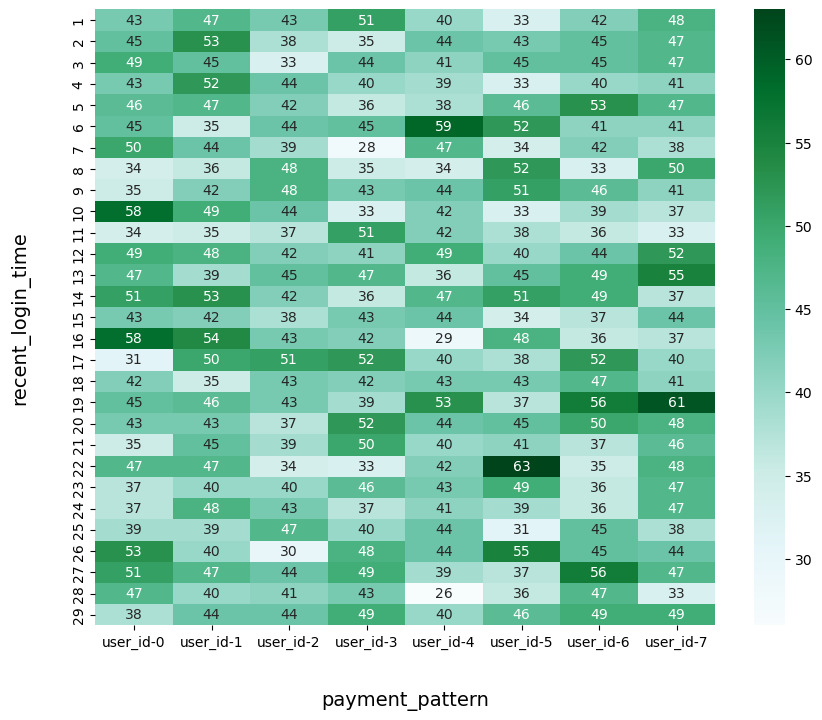

In [24]:
plt.figure(figsize=(10,8))

sns.heatmap(data= login_pivot_table,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           vmin=26,# 색범위 최소값 설정
           vmax=63,# 색범위 최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)

plt.xlabel('payment_pattern', fontsize=14,labelpad=30)

plt.ylabel('recent_login_time', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

7: 3개월 모두 결제함  
6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음 -> 이탈  
5: 첫 달과 마지막 달에 결제함 -> 복귀  
4: 첫 달에만 결제함 -> 이탈  
3: 마지막 2개월에 결제함  
2: 가운데 달에만 결제함 -> 이탈  
1: 마지막 달에만 결제함  
0: 3개월 동안 결제하지 않음

3개월 동안 결제를 하지 않았는데 로그인하는 사람들?

더 비교하기 쉽게 그래프를 그려봐야 할듯

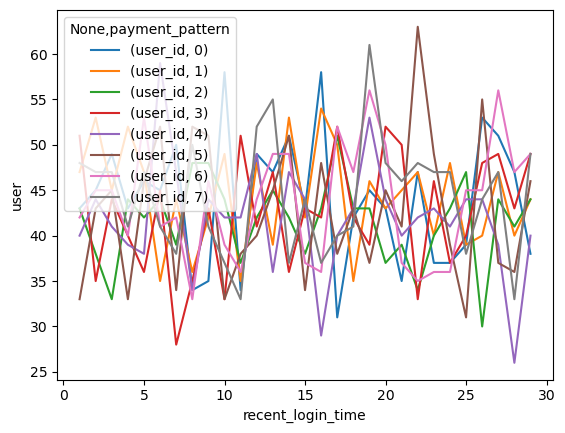

In [25]:
login_pivot_table.plot()
plt.xlabel("recent_login_time")
plt.ylabel("user")
plt.show()

마지막 로그인 시간에 따른 변화는 크게 나타나지 않음

## 학습량과 결제 패턴의 관계  
monthly_active_learning_days: 월간 활동적인 학습 일수  
average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)  
total_completed_courses: 완료한 총 코스 수  
recent_learning_achievement: 최근 학습 성취도

### monthly_active_learning_days: 월간 활동적인 학습 일수

In [26]:
monthdata = data.groupby('monthly_active_learning_days')['user_id'].count()
monthdata

monthly_active_learning_days
1     395
2     397
3     412
4     446
5     423
6     406
7     422
8     452
9     415
10    435
11    368
12    423
13    398
14    414
15    420
16    389
17    433
18    401
19    428
20    447
21    416
22    405
23    396
24    459
Name: user_id, dtype: int64

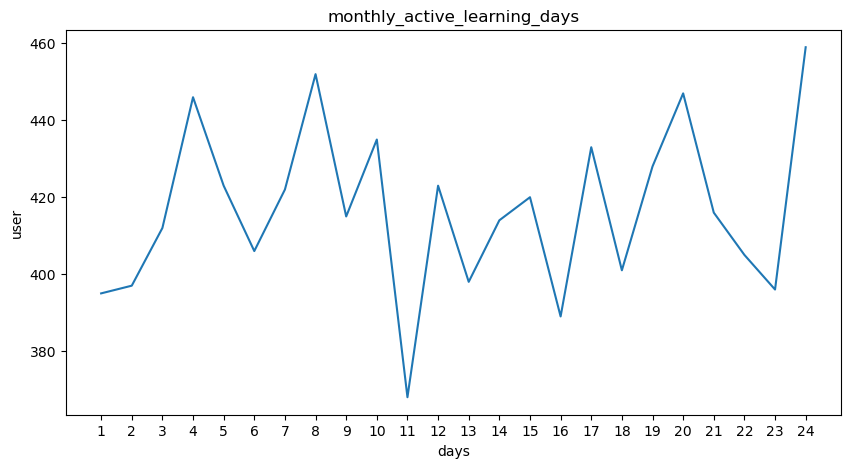

In [27]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(monthdata.index, monthdata.values)

#그래프 명
plt.title('monthly_active_learning_days')

#그래프 x축 레이블
plt.xlabel('days')

#그래프 y축 레이블
plt.ylabel('user')

#x축 눈금 표시 하기
plt.xticks(np.arange(1, 25))

#그래프 출력
plt.show()

활동 학습 일수가 10일에서 11일로 넘어갈 때 급격히 감소하는 것으로 보아, 10일이 심리적 한계선으로 작용하는 사용자가 존재하는 듯하다.  
-> 10일 학습 일수 달성시 동기부여 알림 및 이벤트로 지속적인 학습을 독려하는 것이 필요할듯

### average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)


In [28]:
timedata = data.groupby('average_time_per_learning_session')['user_id'].count()
timedata

average_time_per_learning_session
0.011515      1
0.012562      1
0.013535      1
0.017473      1
0.029555      1
             ..
444.324058    1
447.095844    1
470.289498    1
490.233443    1
503.372616    1
Name: user_id, Length: 10000, dtype: int64

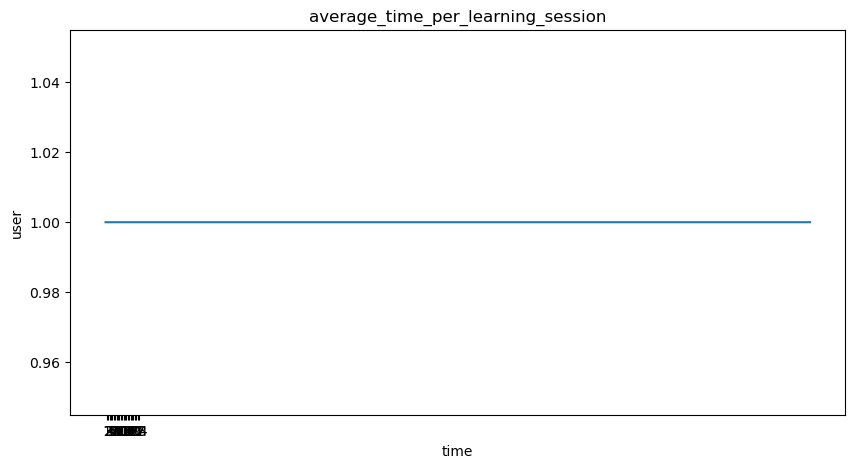

In [29]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(timedata.index, timedata.values)

#그래프 명
plt.title('average_time_per_learning_session')

#그래프 x축 레이블
plt.xlabel('time')

#그래프 y축 레이블
plt.ylabel('user')

#x축 눈금 표시 하기
plt.xticks(np.arange(1, 25))

#그래프 출력
plt.show()

학습 평균 시간을 범주화하여 나타내야 할듯  
최소: 0.011515  
최대: 503.372616  
평균: 54.917720

In [30]:
average_time_per_learning_session = list(data['average_time_per_learning_session'])
average_time_per_learning_session[:10]

[8.427187446481744,
 72.64608658600952,
 21.77449240139784,
 42.659066245301446,
 30.74428701189185,
 34.03418875983523,
 116.45594920591172,
 67.82139292952793,
 37.38421029670329,
 18.696272575764887]

In [31]:
bins = [0, 60, 120, 180, 240, 300, 360, 420, 480, 540]
labels=['1H','2H','3H','4H','5H','6H','7H','8H','9H']

In [32]:
cuts = pd.cut(average_time_per_learning_session, bins, right=True, include_lowest=True, labels=labels)
cuts

['1H', '2H', '1H', '1H', '1H', ..., '2H', '1H', '3H', '1H', '1H']
Length: 10000
Categories (9, object): ['1H' < '2H' < '3H' < '4H' ... '6H' < '7H' < '8H' < '9H']

In [33]:
cuts = pd.DataFrame(cuts)
cuts.tail()

,0
9995,2H
9996,1H
9997,3H
9998,1H
9999,1H


In [34]:
data = pd.concat([data, cuts],axis=1, join='inner')
data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,0
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,2H
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1H
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,3H
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,1H
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0,1H


In [35]:
#data = data.drop('average_time_per_learning_session_range', axis='columns')

In [36]:
data.columns=["user_id","subscription_duration","recent_login_time","average_login_time","average_time_per_learning_session","monthly_active_learning_days","total_completed_courses","recent_learning_achievement","abandoned_learning_sessions","community_engagement_level","preferred_difficulty_level","subscription_type","customer_inquiry_history","payment_pattern","target","average_time_per_learning_session_range"]
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,average_time_per_learning_session_range
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,1H
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,2H
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,1H
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,1H
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,1H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,2H
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1H
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,3H
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,1H


In [37]:
timedata = data.groupby('average_time_per_learning_session_range')['user_id'].count()
timedata

average_time_per_learning_session_range
1H    6682
2H    2190
3H     726
4H     271
5H      79
6H      28
7H      16
8H       6
9H       2
Name: user_id, dtype: int64

<BarContainer object of 9 artists>

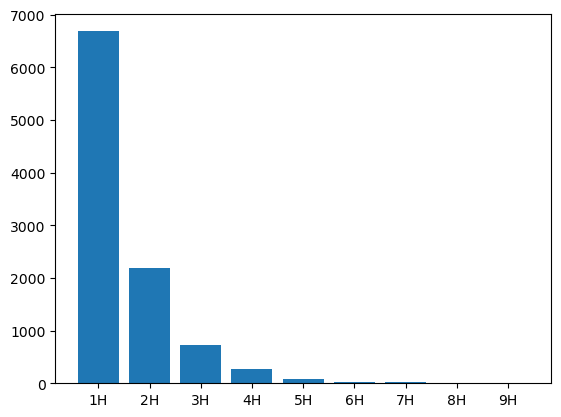

In [38]:
plt.bar(timedata.index, timedata.values)

1시간 이하 학습자가 가장 많음. 2시간 이상 학습자군과 비교했을 때 확연한 차이

### total_completed_courses: 완료한 총 코스 수


In [39]:
coursedata = data.groupby('total_completed_courses')['user_id'].count()
coursedata

total_completed_courses
1        1
2       10
3       23
4       60
5      155
6      238
7      442
8      599
9      806
10     944
11    1064
12    1105
13    1023
14     936
15     783
16     563
17     471
18     326
19     190
20     115
21      62
22      30
23      27
24      12
25       7
26       5
27       3
Name: user_id, dtype: int64

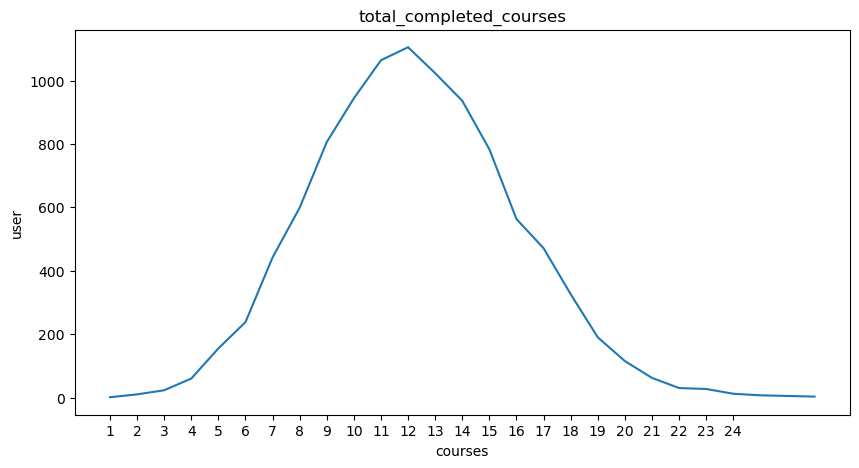

In [40]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5))

#그래프 x축 y축
plt.plot(coursedata.index, coursedata.values)

#그래프 명
plt.title('total_completed_courses')

#그래프 x축 레이블
plt.xlabel('courses')

#그래프 y축 레이블
plt.ylabel('user')

#x축 눈금 표시 하기
plt.xticks(np.arange(1, 25))

#그래프 출력
plt.show()

### recent_learning_achievement: 최근 학습 성취도

In [41]:
learndata = data.groupby('recent_learning_achievement')['user_id'].count()
learndata

recent_learning_achievement
35.941755     1
36.115562     1
36.830979     1
41.752942     1
42.254863     1
             ..
107.135153    1
108.127099    1
109.686851    1
111.219647    1
112.643828    1
Name: user_id, Length: 10000, dtype: int64

성취도 또한 범주화하여 나타내야 할듯  
최소: 35.941755  
최대: 112.643828  
평균: 75.029513

In [42]:
recent_learning_achievement = list(data['recent_learning_achievement'])
recent_learning_achievement[:10]

[68.36045451291152,
 97.56732180488912,
 94.35876337099018,
 70.15322825333023,
 81.91790764651992,
 74.37102805868864,
 58.70838958775084,
 88.56777663662491,
 63.62439481255824,
 57.64699179252341]

In [43]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels=['~20%','~40%','~60%','~80%','~100%','~120%']

In [44]:
cuts = pd.cut(recent_learning_achievement, bins, right=True, include_lowest=True, labels=labels)
cuts

['~80%', '~100%', '~100%', '~80%', '~100%', ..., '~80%', '~100%', '~100%', '~100%', '~80%']
Length: 10000
Categories (6, object): ['~20%' < '~40%' < '~60%' < '~80%' < '~100%' < '~120%']

In [45]:
cuts = pd.DataFrame(cuts)
cuts.tail()

,0
9995,~80%
9996,~100%
9997,~100%
9998,~100%
9999,~80%


In [46]:
data = pd.concat([data, cuts],axis=1, join='inner')
data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,average_time_per_learning_session_range,0
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,2H,~80%
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1H,~100%
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,3H,~100%
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,1H,~100%
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0,1H,~80%


In [47]:
#data = data.drop('recent_learning_achievement_range', axis='columns')

In [48]:
data.columns=["user_id","subscription_duration","recent_login_time","average_login_time","average_time_per_learning_session","monthly_active_learning_days","total_completed_courses","recent_learning_achievement","abandoned_learning_sessions","community_engagement_level","preferred_difficulty_level","subscription_type","customer_inquiry_history","payment_pattern","target","average_time_per_learning_session_range","recent_learning_achievement_range"]
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,average_time_per_learning_session_range,recent_learning_achievement_range
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,1H,~80%
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,2H,~100%
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,1H,~100%
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,1H,~80%
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,1H,~100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1,2H,~80%
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1,1H,~100%
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1,3H,~100%
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1,1H,~100%


In [49]:
learndata = data.groupby('recent_learning_achievement_range')['user_id'].count()
learndata

recent_learning_achievement_range
~20%        0
~40%        3
~60%      672
~80%     6219
~100%    3048
~120%      58
Name: user_id, dtype: int64

<BarContainer object of 6 artists>

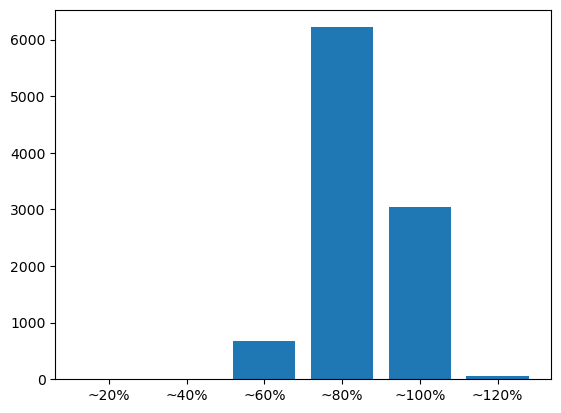

In [50]:
plt.bar(learndata.index, learndata.values)

60~100% 학습자가 대다수

### 학습량과 결제 패턴의 관계

average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)  
total_completed_courses: 완료한 총 코스 수  
    
두 항목에서 구간별 큰 차이가 나타나므로 이를 활용해 결제패턴과의 관계를 파악해보기

In [51]:
study = data.groupby('average_time_per_learning_session_range')['user_id'].count()
study

average_time_per_learning_session_range
1H    6682
2H    2190
3H     726
4H     271
5H      79
6H      28
7H      16
8H       6
9H       2
Name: user_id, dtype: int64

In [52]:
study_pay = data.groupby(['payment_pattern', 'average_time_per_learning_session_range'])
study_pay

In [53]:
study_data = study_pay['user_id'].apply(pd.Series.nunique)
study_data = pd.DataFrame(study_data)
study_data

user_id
payment_pattern average_time_per_learning_session_range         
0               1H                                         862.0
                2H                                         280.0
                3H                                          96.0
                4H                                          23.0
                5H                                          11.0
...                                                          ...
7               5H                                          12.0
                6H                                           4.0
                7H                                           3.0
                8H                                           NaN
                9H                                           1.0

[72 rows x 1 columns]

In [54]:
#피벗 테이블로 표시

study_pivot_table = study_data.pivot_table(index=["average_time_per_learning_session_range"],
                                    columns=["payment_pattern"],
                                    values=["user_id"])
study_pivot_table.head()

user_id                              \
payment_pattern                               0      1      2      3      4   
average_time_per_learning_session_range                                       
1H                                        862.0  835.0  797.0  832.0  789.0   
2H                                        280.0  289.0  291.0  253.0  269.0   
3H                                         96.0   96.0   72.0   89.0   99.0   
4H                                         23.0   44.0   38.0   35.0   39.0   
5H                                         11.0   10.0    5.0   15.0    9.0   

                                                              
payment_pattern                              5      6      7  
average_time_per_learning_session_range                       
1H                                       829.0  858.0  880.0  
2H                                       273.0  270.0  265.0  
3H                                        93.0   95.0   86.0  
4H                                        24.0   35.0   33.0  
5H                                        10.0    7.0   12.0

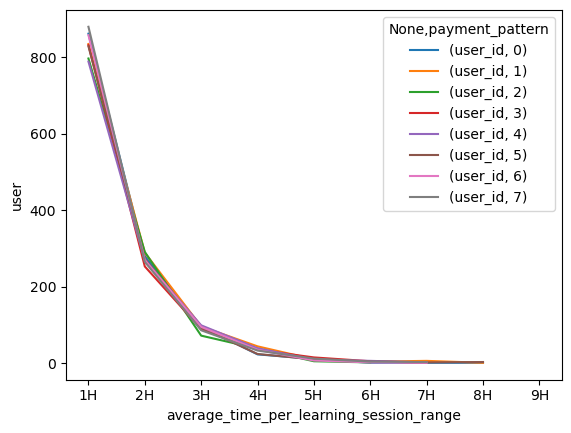

In [55]:
study_pivot_table.plot()
plt.xlabel("average_time_per_learning_session_range")
plt.ylabel("users")
plt.show()

차이를 알아보기 힘들다

(7: 3개월 모두 결제함  
6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음 -> 이탈  
5: 첫 달과 마지막 달에 결제함 -> 복귀  
4: 첫 달에만 결제함 -> 이탈  
3: 마지막 2개월에 결제함  
2: 가운데 달에만 결제함 -> 이탈  
1: 마지막 달에만 결제함  
0: 3개월 동안 결제하지 않음)  
* 이중 7번과 2,4,6번을 비교해보자.(0,1,3,5 제외)
* 변화가 큰 부분만 따로 비교해보자

In [56]:
study_pivot_table.reset_index(inplace=True)
study_pivot_table

average_time_per_learning_session_range user_id                \
payment_pattern                                               0      1      2   
0                                                    1H   862.0  835.0  797.0   
1                                                    2H   280.0  289.0  291.0   
2                                                    3H    96.0   96.0   72.0   
3                                                    4H    23.0   44.0   38.0   
4                                                    5H    11.0   10.0    5.0   
5                                                    6H     1.0    4.0    2.0   
6                                                    7H     1.0    6.0    NaN   
7                                                    8H     1.0    1.0    1.0   
8                                                    9H     NaN    NaN    NaN   

                                                    
payment_pattern      3      4      5      6      7  
0                832.0  789.0  829.0  858.0  880.0  
1                253.0  269.0  273.0  270.0  265.0  
2                 89.0   99.0   93.0   95.0   86.0  
3                 35.0   39.0   24.0   35.0   33.0  
4                 15.0    9.0   10.0    7.0   12.0  
5                  5.0    6.0    4.0    2.0    4.0  
6                  1.0    2.0    2.0    1.0    3.0  
7                  NaN    NaN    3.0    NaN    NaN  
8                  NaN    1.0    NaN    NaN    1.0

In [57]:
study_pivot_table.columns

MultiIndex([('average_time_per_learning_session_range',  ''),
            (                                'user_id', '0'),
            (                                'user_id', '1'),
            (                                'user_id', '2'),
            (                                'user_id', '3'),
            (                                'user_id', '4'),
            (                                'user_id', '5'),
            (                                'user_id', '6'),
            (                                'user_id', '7')],
           names=[None, 'payment_pattern'])

In [58]:
study_pivot_table_2 = study_pivot_table.loc[:2, [(                                'user_id', '2'),
            (                                'user_id', '4'),
            (                                'user_id', '6'),
            (                                'user_id', '7')]]
study_pivot_table_2

user_id                     
payment_pattern       2      4      6      7
0                 797.0  789.0  858.0  880.0
1                 291.0  269.0  270.0  265.0
2                  72.0   99.0   95.0   86.0

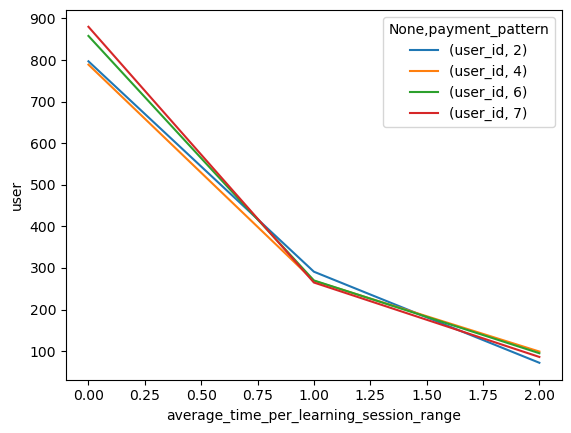

In [59]:
study_pivot_table_2.plot()
plt.xlabel("average_time_per_learning_session_range")
plt.ylabel("users")
plt.show()

In [60]:
courses = data.groupby('total_completed_courses')['user_id'].count()
courses

total_completed_courses
1        1
2       10
3       23
4       60
5      155
6      238
7      442
8      599
9      806
10     944
11    1064
12    1105
13    1023
14     936
15     783
16     563
17     471
18     326
19     190
20     115
21      62
22      30
23      27
24      12
25       7
26       5
27       3
Name: user_id, dtype: int64

In [61]:
courses_pay = data.groupby(['payment_pattern', 'total_completed_courses'])
courses_pay

In [62]:
courses_data = courses_pay['user_id'].apply(pd.Series.nunique)
courses_data = pd.DataFrame(courses_data)
courses_data

user_id
payment_pattern total_completed_courses         
0               2                              1
                4                              6
                5                             27
                6                             30
                7                             39
...                                          ...
7               22                             1
                23                             2
                24                             3
                25                             2
                27                             1

[193 rows x 1 columns]

In [63]:
#피벗 테이블로 표시

coursees_pivot_table = courses_data.pivot_table(index=["total_completed_courses"],
                                    columns=["payment_pattern"],
                                    values=["user_id"])
coursees_pivot_table.head()

user_id                                          
payment_pattern               0     1     2     3     4     5     6     7
total_completed_courses                                                  
1                           NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0
2                           1.0   2.0   1.0   1.0   1.0   1.0   2.0   1.0
3                           NaN   1.0   4.0   3.0   6.0   3.0   3.0   3.0
4                           6.0   8.0   7.0  10.0  10.0   4.0   7.0   8.0
5                          27.0  20.0  21.0  15.0  18.0  24.0  19.0  11.0

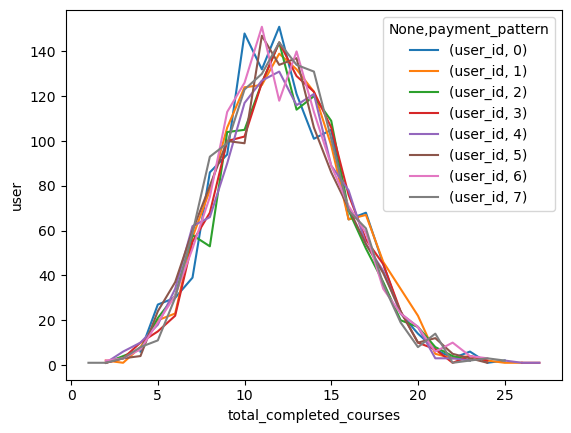

In [64]:
coursees_pivot_table.plot()
plt.xlabel("total_completed_courses")
plt.ylabel("users")
plt.show()

이쯤되면 결제 패턴과의 관계성은 없다고 봐야 할지?

## 학습 성취도-중단 학습 세션 수와 결제 패턴의 관계

최근 학습 성취도가 낮을수록, 중단된 학습 세션 수가 많을수록 구독 연장 확률이 낮을 것  
* recent_learning_achievement: 최근 학습 성취도
* abandoned_learning_sessions: 중단된 학습 세션 수

In [65]:
learndata = data.groupby('recent_learning_achievement_range')['user_id'].count()
learndata

recent_learning_achievement_range
~20%        0
~40%        3
~60%      672
~80%     6219
~100%    3048
~120%      58
Name: user_id, dtype: int64

In [69]:
learn_pay = data.groupby(['payment_pattern', 'recent_learning_achievement_range'])
learn_pay

In [80]:
learn_data = learn_pay['user_id'].apply(pd.Series.nunique)
learn_data = pd.DataFrame(learn_data)
learn_data.head()

user_id
payment_pattern recent_learning_achievement_range         
0               ~20%                                   NaN
                ~40%                                   NaN
                ~60%                                  79.0
                ~80%                                 801.0
                ~100%                                389.0

In [71]:
#피벗 테이블로 표시

learn_pivot_table = learn_data.pivot_table(index=["recent_learning_achievement_range"],
                                    columns=["payment_pattern"],
                                    values=["user_id"])
learn_pivot_table.head()

user_id                                     \
payment_pattern                         0      1      2      3      4      5   
recent_learning_achievement_range                                              
~40%                                  NaN    NaN    1.0    NaN    NaN    1.0   
~60%                                 79.0   87.0   72.0   90.0   83.0   94.0   
~80%                                801.0  809.0  744.0  781.0  747.0  734.0   
~100%                               389.0  386.0  377.0  352.0  374.0  401.0   
~120%                                 6.0    3.0   12.0    7.0   10.0    8.0   

                                                 
payment_pattern                        6      7  
recent_learning_achievement_range                
~40%                                 1.0    NaN  
~60%                                85.0   82.0  
~80%                               797.0  806.0  
~100%                              378.0  391.0  
~120%                                7.0    5.0

In [73]:
learn_pivot_table.describe()

user_id                                                  \
payment_pattern           0           1           2           3           4   
count              4.000000    4.000000    5.000000    4.000000    4.000000   
mean             318.750000  321.250000  241.200000  307.500000  303.500000   
std              361.843774  364.348162  320.197908  348.228373  334.875599   
min                6.000000    3.000000    1.000000    7.000000   10.000000   
25%               60.750000   66.000000   12.000000   69.250000   64.750000   
50%              234.000000  236.500000   72.000000  221.000000  228.500000   
75%              492.000000  491.750000  377.000000  459.250000  467.250000   
max              801.000000  809.000000  744.000000  781.000000  747.000000   

                                                     
payment_pattern           5           6           7  
count              5.000000    5.000000    4.000000  
mean             247.600000  253.600000  321.000000  
std              316.989432  340.515492  363.823217  
min                1.000000    1.000000    5.000000  
25%                8.000000    7.000000   62.750000  
50%               94.000000   85.000000  236.500000  
75%              401.000000  378.000000  494.750000  
max              734.000000  797.000000  806.000000

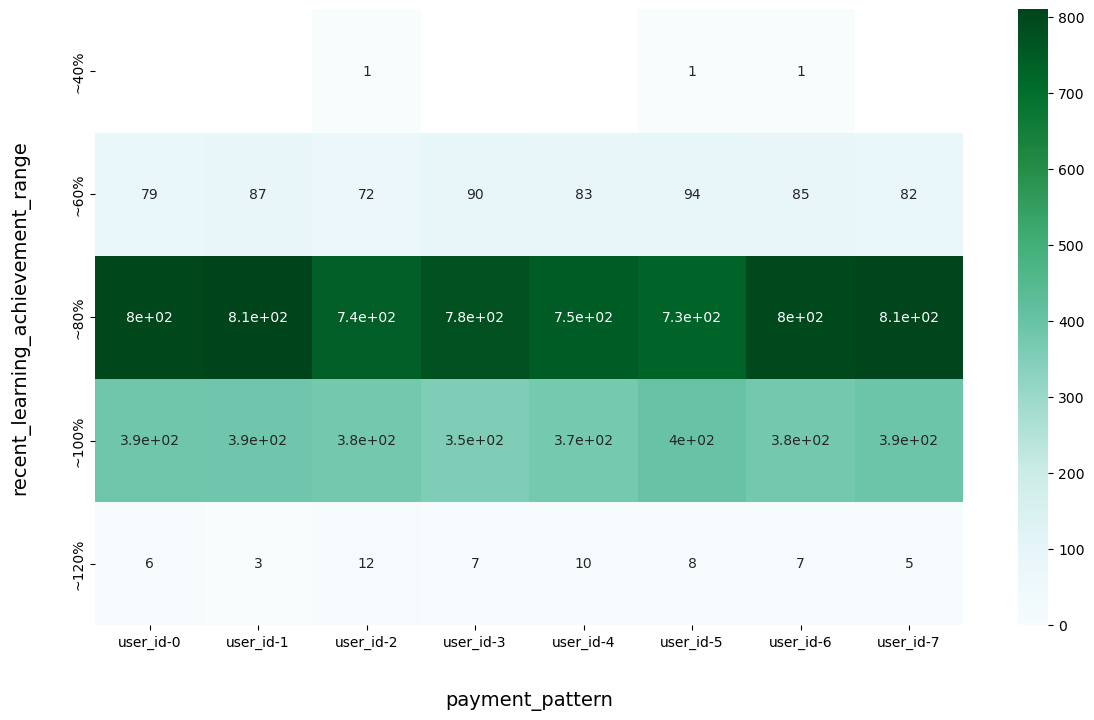

In [77]:
plt.figure(figsize=(14,8))

sns.heatmap(data= learn_pivot_table,
           annot=True, #각 cell의 데이터 표기 유무를 나타냅니다!
           vmin=0,# 색범위 최소값 설정
           vmax=810,# 색범위 최댓값 설정
           cmap="BuGn" #히트맵의 색을 설정합니다
						)

plt.xlabel('payment_pattern', fontsize=14,labelpad=30)

plt.ylabel('recent_learning_achievement_range', fontsize=14,labelpad=30)
plt.yticks()

plt.show()

구독연장 여부와의 관계는?

In [78]:
learndata = data.groupby('recent_learning_achievement_range')['user_id'].count()
learndata

recent_learning_achievement_range
~20%        0
~40%        3
~60%      672
~80%     6219
~100%    3048
~120%      58
Name: user_id, dtype: int64

In [79]:
learn_target = data.groupby(['target', 'recent_learning_achievement_range'])
learn_target

In [82]:
learn_data = learn_target['user_id'].apply(pd.Series.nunique)
learn_data = pd.DataFrame(learn_data)
learn_data

user_id
target recent_learning_achievement_range         
0      ~20%                                   NaN
       ~40%                                   1.0
       ~60%                                 252.0
       ~80%                                2378.0
       ~100%                               1149.0
       ~120%                                 21.0
1      ~20%                                   NaN
       ~40%                                   2.0
       ~60%                                 420.0
       ~80%                                3841.0
       ~100%                               1899.0
       ~120%                                 37.0

In [115]:
#피벗 테이블로 표시

learn_pivot_table = learn_data.pivot_table(index=["recent_learning_achievement_range"],
                                    columns=["target"],
                                    values=["user_id"])
learn_pivot_table.head()

user_id        
target                                  0       1
recent_learning_achievement_range                
~40%                                  1.0     2.0
~60%                                252.0   420.0
~80%                               2378.0  3841.0
~100%                              1149.0  1899.0
~120%                                21.0    37.0

In [116]:
learn_pivot_table.columns

MultiIndex([('user_id', '0'),
            ('user_id', '1')],
           names=[None, 'target'])

In [121]:
total_0 = learn_pivot_table['user_id', '0'].sum()
total_0

3801.0

In [122]:
total_1 = learn_pivot_table['user_id', '1'].sum()
total_1

6199.0

In [144]:
learn_pivot_table_0 = learn_pivot_table['user_id', '0']
learn_pivot_table_0

recent_learning_achievement_range
~40%        1.0
~60%      252.0
~80%     2378.0
~100%    1149.0
~120%      21.0
Name: (user_id, 0), dtype: float64

In [145]:
learn_pivot_table_1 = learn_pivot_table['user_id', '1']
learn_pivot_table_1

recent_learning_achievement_range
~40%        2.0
~60%      420.0
~80%     3841.0
~100%    1899.0
~120%      37.0
Name: (user_id, 1), dtype: float64

In [146]:
learn_pivot_table_0 = learn_pivot_table_0.divide(total_0)
learn_pivot_table_0.head()

recent_learning_achievement_range
~40%     0.000263
~60%     0.066298
~80%     0.625625
~100%    0.302289
~120%    0.005525
Name: (user_id, 0), dtype: float64

In [147]:
learn_pivot_table_1 = learn_pivot_table_1.divide(total_1)
learn_pivot_table_1.head()

recent_learning_achievement_range
~40%     0.000323
~60%     0.067753
~80%     0.619616
~100%    0.306340
~120%    0.005969
Name: (user_id, 1), dtype: float64

In [149]:
learn_pivot_table_0_100 = learn_pivot_table_0.round(3)*100
learn_pivot_table_0_100

recent_learning_achievement_range
~40%      0.0
~60%      6.6
~80%     62.6
~100%    30.2
~120%     0.6
Name: (user_id, 0), dtype: float64

In [150]:
learn_pivot_table_1_100 = learn_pivot_table_1.round(3)*100
learn_pivot_table_1_100

recent_learning_achievement_range
~40%      0.0
~60%      6.8
~80%     62.0
~100%    30.6
~120%     0.6
Name: (user_id, 1), dtype: float64

In [151]:
learn_pivot_table_100 = pd.concat([learn_pivot_table_0_100, learn_pivot_table_1_100], axis=1)
learn_pivot_table_100

user_id      
                                        0     1
recent_learning_achievement_range              
~40%                                  0.0   0.0
~60%                                  6.6   6.8
~80%                                 62.6  62.0
~100%                                30.2  30.6
~120%                                 0.6   0.6

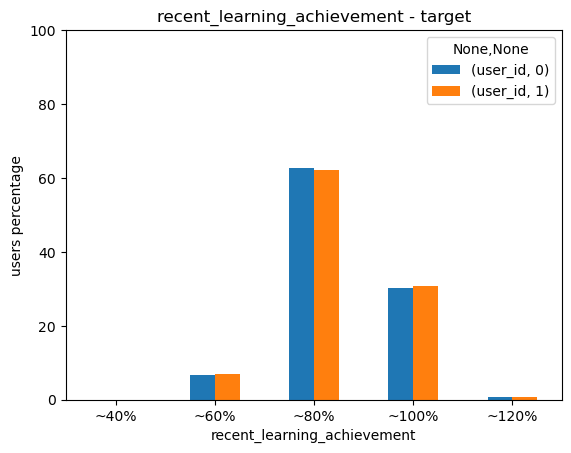

In [153]:
learn_pivot_table_100.plot.bar(rot=0)
plt.title("recent_learning_achievement - target")
plt.xlabel("recent_learning_achievement")
plt.ylabel("users percentage")
plt.ylim(0, 100)
plt.show()

구독 취소 예정 집단과 구독 연장 예정 집단 간에 학습 성취도의 차이가 나타나지 않음

In [154]:
abnd = data.groupby('abandoned_learning_sessions')['user_id'].count()
abnd

abandoned_learning_sessions
0      464
1     1485
2     2226
3     2195
4     1704
5     1026
6      530
7      237
8       91
9       27
10       9
11       4
12       2
Name: user_id, dtype: int64

In [160]:
abnd_target = data.groupby(['abandoned_learning_sessions', 'target', 'recent_learning_achievement_range'])
abnd_target

In [161]:
abnd_data = abnd_target['user_id'].apply(pd.Series.nunique)
abnd_data = pd.DataFrame(abnd_data)
abnd_data

user_id
abandoned_learning_sessions target recent_learning_achievement_range         
0                           0      ~20%                                   NaN
                                   ~40%                                   NaN
                                   ~60%                                  10.0
                                   ~80%                                 106.0
                                   ~100%                                 55.0
...                                                                       ...
12                          1      ~40%                                   NaN
                                   ~60%                                   NaN
                                   ~80%                                   NaN
                                   ~100%                                  2.0
                                   ~120%                                  NaN

[156 rows x 1 columns]

In [166]:
#피벗 테이블로 표시

abnd_pivot_table = abnd_data.pivot_table(index=["recent_learning_achievement_range"],
                                    columns=["abandoned_learning_sessions"],
                                    values=["user_id"])
abnd_pivot_table

user_id                                     \
abandoned_learning_sessions            0      1      2      3      4      5    
recent_learning_achievement_range                                              
~40%                                  1.0    NaN    1.0    NaN    1.0    NaN   
~60%                                 13.5   55.5   87.0   64.5   50.0   31.0   
~80%                                144.5  445.5  691.5  691.0  540.5  318.5   
~100%                                72.5  238.0  327.0  334.5  256.5  160.5   
~120%                                 1.0    3.5    7.0   15.0    4.5    3.0   

                                                                          
abandoned_learning_sessions           6     7     8    9    10   11   12  
recent_learning_achievement_range                                         
~40%                                 NaN   NaN   NaN  NaN  NaN  NaN  NaN  
~60%                                22.0   8.0   3.0  1.5  NaN  NaN  NaN  
~80%                               163.5  75.5  26.5  8.0  3.0  1.5  NaN  
~100%                               78.5  33.5  16.0  4.0  1.5  1.0  2.0  
~120%                                1.0   1.5   NaN  NaN  NaN  NaN  NaN

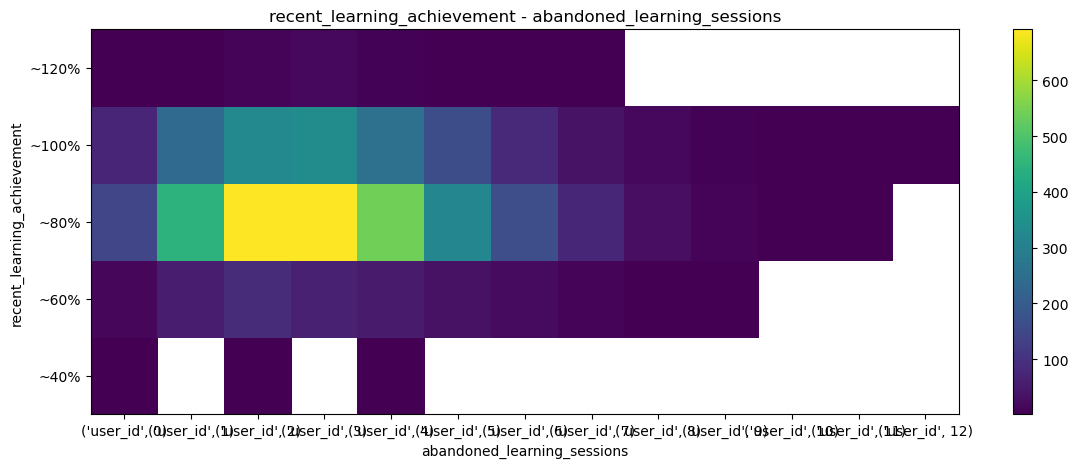

In [171]:
# 히트맵으로 나타내기
#그래프 사이즈 변경
plt.figure(figsize=(14,5))

#pcolor를 이용하여 heatmap 그리기
plt.pcolor(abnd_pivot_table)

#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(abnd_pivot_table.columns), 1), abnd_pivot_table.columns)

#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(abnd_pivot_table.index), 1), abnd_pivot_table.index)

#그래프 명
plt.title('recent_learning_achievement - abandoned_learning_sessions')

#그래프 x축 레이블
plt.xlabel('abandoned_learning_sessions')

#그래프 y축 레이블
plt.ylabel('recent_learning_achievement')

#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다
plt.colorbar()
plt.show()

## 난이도와 구독 연장 여부의 관계

* preferred_difficulty_level: 선호하는 난이도

In [172]:
diff = pd.pivot_table(data, values= 'user_id',
                            columns=['payment_pattern'],
                            index=['preferred_difficulty_level'],
                            aggfunc="count")
diff

payment_pattern,0,1,2,3,4,5,6,7
preferred_difficulty_level,,,,,,,,
High,240,235,250,269,237,241,261,267
Low,643,679,596,609,624,602,608,631
Medium,392,371,360,352,353,395,399,386


In [174]:
diff_2 = pd.pivot_table(data, values= 'user_id',
                            columns=['target'],
                            index=['preferred_difficulty_level'],
                            aggfunc="count")
diff_2

target,0,1
preferred_difficulty_level,,
High,759,1241
Low,1945,3047
Medium,1097,1911


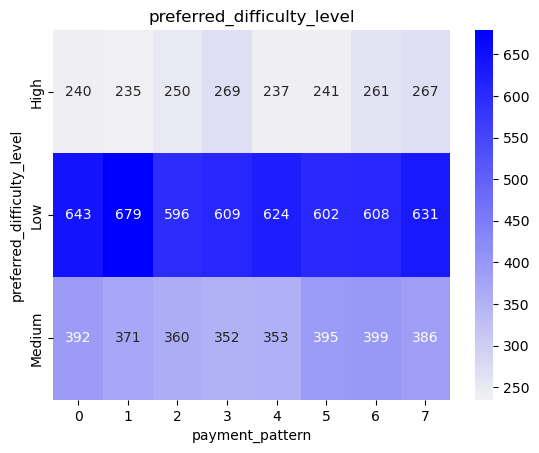

In [175]:
sns.heatmap(diff, cmap=sns.light_palette("blue", as_cmap=True), annot=True, fmt="d")
plt.title("preferred_difficulty_level")
plt.show()

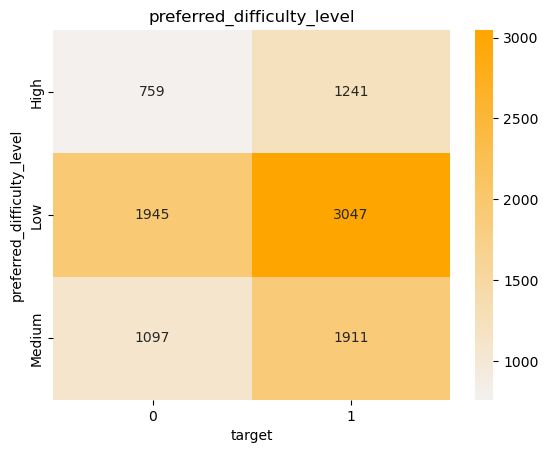

In [176]:
sns.heatmap(diff_2, cmap=sns.light_palette("orange", as_cmap=True), annot=True, fmt="d")
plt.title("preferred_difficulty_level")
plt.show()